In [1]:
# Importing libraries
import pandas as pd
import statsmodels.api as sm
import math
#import numpy as np

In [2]:
# Importing data
reds = pd.read_csv("RED_snaps_pivoted_joined.csv")
greys = pd.read_csv("GREY_snaps_pivoted_joined.csv")

In [3]:
# Counting NaNs for reds
print(reds.shape)
nan_count = reds.isna().sum()
with pd.option_context('display.max_rows', None):
    display(nan_count)

(71704, 63)


fault_alarm_id                    0
Battery Level                     0
Coolant Temperature               1
Engine Crankcase Pressure       415
Engine Exhaust Temperature     4552
Engine Oil Temperature            3
Engine Speed                      0
Fan Status On/Off                 0
Intake Air Pressure             250
Oil Pressure                     18
Road Speed                      316
component_id                      0
vehicle_id                        0
message_date_time                 0
longitude                         0
latitude                          0
city_name                       376
state_cd                        487
fault_count                       0
component_type                    0
fmi_id                            0
ecu_type                          0
fault_active                      0
position_timestamp                0
create_date                       0
heading                           0
elevation                         0
date                        

In [4]:
# Counting NaNs for greys
print(greys.shape)
nan_count = greys.isna().sum()
with pd.option_context('display.max_rows', None):
    display(nan_count)

(6593676, 63)


fault_alarm_id                      0
Battery Level                       1
Coolant Temperature               174
Engine Crankcase Pressure       71604
Engine Exhaust Temperature      74721
Engine Oil Temperature           6722
Engine Speed                       19
Fan Status On/Off                 151
Intake Air Pressure             66184
Oil Pressure                     1352
Road Speed                      27935
component_id                        0
vehicle_id                          0
message_date_time                   0
longitude                           0
latitude                            0
city_name                       25062
state_cd                        36778
fault_count                         0
component_type                      0
fmi_id                              0
ecu_type                            0
fault_active                        0
position_timestamp                  0
create_date                         0
heading                             0
elevation   

In [5]:
# Drop columns with too many NaNs
reds = reds.drop(columns=['gross_combined_weight', 'inactive_cd', 'dispatch_dt', 'create_date', 'date', 'rank', 'vehicle_id.1', 'vehicle_spec_id', 'retail_dt', 'mq_message_put_dt', 'main_assembly_dt', 'final_assembly_dt', 'factory_invoice_dt', 'create_dt', 'component_id', 'vehicle_id', 'fmi_id', 'position_timestamp', 'imsi'])
greys = greys.drop(columns=['gross_combined_weight', 'inactive_cd', 'dispatch_dt', 'create_date', 'date', 'rank', 'vehicle_id.1', 'vehicle_spec_id', 'retail_dt', 'mq_message_put_dt', 'main_assembly_dt', 'final_assembly_dt', 'factory_invoice_dt', 'create_dt', 'component_id', 'vehicle_id', 'fmi_id', 'position_timestamp', 'imsi'])

In [6]:
# Turning reds and greys into boolean values
reds['red_fault'] = 1
greys['red_fault'] = 0

In [7]:
# Sampling 9 greys for every red fault
greys = greys.sample(n=reds.shape[0]*9, random_state=1)

print(greys.shape)
nan_count = greys.isna().sum()
with pd.option_context('display.max_rows', None):
    display(nan_count)

(645336, 45)


fault_alarm_id                    0
Battery Level                     1
Coolant Temperature              18
Engine Crankcase Pressure      7109
Engine Exhaust Temperature     7472
Engine Oil Temperature          647
Engine Speed                      3
Fan Status On/Off                16
Intake Air Pressure            6596
Oil Pressure                    125
Road Speed                     2764
message_date_time                 0
longitude                         0
latitude                          0
city_name                      2553
state_cd                       3719
fault_count                       0
component_type                    0
ecu_type                          0
fault_active                      0
heading                           0
elevation                         0
odometer_reading                  1
engine_status                     0
idle_engine_hours                 0
total_fuel                     4630
engine_hours                  30618
vehicle_type                

In [8]:
# Concatenating reds and greys
faults = pd.concat([reds, greys])

In [9]:
print(faults['red_fault'].mean())

0.1


In [10]:
# Memory cleanup
del reds, greys

In [11]:
# Counting NaNs for faults
print(faults.shape)
nan_count = faults.isna().sum()
with pd.option_context('display.max_rows', None):
    display(nan_count)

(717040, 45)


fault_alarm_id                    0
Battery Level                     1
Coolant Temperature              19
Engine Crankcase Pressure      7524
Engine Exhaust Temperature    12024
Engine Oil Temperature          650
Engine Speed                      3
Fan Status On/Off                16
Intake Air Pressure            6846
Oil Pressure                    143
Road Speed                     3080
message_date_time                 0
longitude                         0
latitude                          0
city_name                      2929
state_cd                       4206
fault_count                       0
component_type                    0
ecu_type                          0
fault_active                      0
heading                           0
elevation                         0
odometer_reading                  1
engine_status                     0
idle_engine_hours                 0
total_fuel                     4840
engine_hours                  33200
vehicle_type                

In [12]:
# Dropping NaNs
faults = faults.dropna()

In [13]:
with pd.option_context('display.max_columns', None):
    display(faults)

,fault_alarm_id,Battery Level,Coolant Temperature,Engine Crankcase Pressure,Engine Exhaust Temperature,Engine Oil Temperature,Engine Speed,Fan Status On/Off,Intake Air Pressure,Oil Pressure,Road Speed,message_date_time,longitude,latitude,city_name,state_cd,fault_count,component_type,ecu_type,fault_active,heading,elevation,odometer_reading,engine_status,idle_engine_hours,total_fuel,engine_hours,vehicle_type,vehicle_model_year,vehicle_model,vehicle_make,veh_version,tgw_serial,product_type,notif_type,model_family,in_service_dt,in_process,gross_wt_rating,engine_type,engine_make,country_of_operation,chassis_series,chassis_number,red_fault
0,2342958898,13.9,122.0,14.054157,224.26250,118.29,600.0,off,15.37400,45.25177,0.0,2022-07-01 00:10:13,-97.694339,35.462159,Yukon,OK,2,SPN,0,Y,286.0,1365.0,336319.966,1,2703.304,46275.943014,7821.061,D,2021,VNL64T N,VOLVO,111,19447430.0,VNL6,UPDATED,VN,2020-03-23 00:00:00,N,24131.0,US20,VOLVO,CAN,NR,242173,1
3,2342965611,14.1,195.8,14.242706,554.90000,223.03,973.0,on,20.88543,33.64876,16.0,2022-07-01 00:16:00,-118.149819,34.151690,Pasadena,CA,3,SPN,0,Y,83.0,830.0,221848.728,1,3652.355,33404.027677,7250.710,D,2021,VNL64T N,VOLVO,95,19497198.0,VNL6,UPDATED,VN,2020-10-26 00:00:00,N,22838.0,US20,VOLVO,USA,NR,246173,1
4,2342969381,14.0,179.6,14.257210,475.81250,212.34,967.0,on,18.27475,42.35102,12.0,2022-07-01 00:18:54,-118.134567,34.151662,Pasadena,CA,2,SPN,0,N,90.0,830.0,221848.728,1,3652.355,33404.027677,7250.710,D,2021,VNL64T N,VOLVO,95,19497198.0,VNL6,UPDATED,VN,2020-10-26 00:00:00,N,22838.0,US20,VOLVO,USA,NR,246173,1
5,2342969388,14.0,179.6,14.257210,475.81250,212.34,967.0,on,18.27475,42.35102,12.0,2022-07-01 00:18:54,-118.134567,34.151662,Pasadena,CA,3,SPN,0,N,90.0,830.0,221848.728,1,3652.355,33404.027677,7250.710,D,2021,VNL64T N,VOLVO,95,19497198.0,VNL6,UPDATED,VN,2020-10-26 00:00:00,N,22838.0,US20,VOLVO,USA,NR,246173,1
6,2342969405,13.8,179.6,14.257210,475.81250,212.34,967.0,on,18.27475,42.35102,12.0,2022-07-01 00:18:54,-118.134567,34.151662,Pasadena,CA,2,SPN,0,N,90.0,830.0,221848.728,1,3652.355,33404.027677,7250.710,D,2021,VNL64T N,VOLVO,95,19497198.0,VNL6,UPDATED,VN,2020-10-26 00:00:00,N,22838.0,US20,VOLVO,USA,NR,246173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778359,2471696407,14.1,181.4,14.286217,541.17500,214.59,1454.0,on,27.26709,57.43494,63.0,2022-09-16 18:56:29,-77.981211,43.029428,Bergen,NY,0,PSID,140,N,271.0,748.0,183968.114,1,942.801,31138.356070,4466.806,D,2021,VNM64T N,VOLVO,89,20297493.0,VNR6,UPDATED,VN,2020-09-29 00:00:00,N,23745.0,US20,VOLVO,USA,NR,280021,0
5737248,2620562164,14.0,190.4,14.184691,636.46250,221.05,1607.0,off,51.05328,58.59525,43.0,2022-12-07 23:59:57,-84.527140,39.061130,Covington,KY,66,SPN,0,Y,249.0,764.0,97042.522,1,4292.706,18575.522034,6029.159,D,2022,AN64T,MACK,64,21367071.0,CMM,UPDATED,AN,2021-12-29 00:00:00,N,24131.0,US21,VOLVO,USA,M742,27334,0
4861344,2576479581,14.0,179.6,14.576293,376.19375,204.24,600.0,off,12.47325,22.04574,0.0,2022-11-14 21:55:50,-64.481880,48.829871,Gaspe,QC,8,SPN,3,N,26.0,59.0,201103.462,1,945.601,32565.545582,4657.557,D,2021,VNL64T N,VOLVO,97,20427165.0,VNL6,UPDATED,VN,2020-12-21 00:00:00,N,24131.0,US20,VOLVO,CAN,NR,284273,0
3132127,2490126713,14.0,201.2,12.531261,335.24375,223.36,600.0,off,12.47325,18.56483,0.0,2022-09-27 21:56:51,-104.341566,44.413027,Sundance,WY,46,SPN,3,I,18.0,4662.0,237550.486,1,3315.905,35206.077332,7149.610,D,2021,VNL64T N,VOLVO,100,20347618.0,VNL6,UPDATED,VN,2020-10-23 00:00:00,N,23223.0,US20,VOLVO,USA,NR,281334,0


In [14]:
# Transforms the idle_engine_hours to hours
faults['idle_engine_hours'] = faults['idle_engine_hours'] / 3600

# Calculates the active_engine_hours
faults['active_engine_days'] = (faults['engine_hours'] - faults['idle_engine_hours'])/24
print(faults['active_engine_days'])

0          325.846253
3          302.070644
4          302.070644
5          302.070644
6          302.070644
              ...    
2778359    186.106005
5737248    251.165274
4861344    194.053931
3132127    297.862038
6441155    477.472257
Name: active_engine_days, Length: 661478, dtype: float64


In [15]:
# Memory cleanup
faults = faults.drop(columns=['engine_hours', 'idle_engine_hours'])

In [16]:
# Calculate the vehicle service age in days
faults['vehicle_service_age'] = pd.to_datetime(faults['message_date_time']) - pd.to_datetime(faults['in_service_dt'])
faults['vehicle_service_age'] = faults['vehicle_service_age'].dt.days
print(faults['vehicle_service_age'])

0           830
3           613
4           613
5           613
6           613
           ... 
2778359     717
5737248     343
4861344     693
3132127     704
6441155    1076
Name: vehicle_service_age, Length: 661478, dtype: int32


In [17]:
# Memory cleanup
faults = faults.drop(columns=['message_date_time', 'in_service_dt'])

In [18]:
# Turns vehicle make into a boolean
volvor = lambda x: 1 if x == "VOLVO" else 0
faults['volvo'] = faults['vehicle_make'].apply(volvor)
print(faults['volvo'].mean())

0.6732453687046281


In [19]:
print(faults['red_fault'].mean())

0.09644765207610835


In [20]:
with pd.option_context('display.max_columns', None):
    display(faults)

,fault_alarm_id,Battery Level,Coolant Temperature,Engine Crankcase Pressure,Engine Exhaust Temperature,Engine Oil Temperature,Engine Speed,Fan Status On/Off,Intake Air Pressure,Oil Pressure,Road Speed,longitude,latitude,city_name,state_cd,fault_count,component_type,ecu_type,fault_active,heading,elevation,odometer_reading,engine_status,total_fuel,vehicle_type,vehicle_model_year,vehicle_model,vehicle_make,veh_version,tgw_serial,product_type,notif_type,model_family,in_process,gross_wt_rating,engine_type,engine_make,country_of_operation,chassis_series,chassis_number,red_fault,active_engine_days,vehicle_service_age,volvo
0,2342958898,13.9,122.0,14.054157,224.26250,118.29,600.0,off,15.37400,45.25177,0.0,-97.694339,35.462159,Yukon,OK,2,SPN,0,Y,286.0,1365.0,336319.966,1,46275.943014,D,2021,VNL64T N,VOLVO,111,19447430.0,VNL6,UPDATED,VN,N,24131.0,US20,VOLVO,CAN,NR,242173,1,325.846253,830,1
3,2342965611,14.1,195.8,14.242706,554.90000,223.03,973.0,on,20.88543,33.64876,16.0,-118.149819,34.151690,Pasadena,CA,3,SPN,0,Y,83.0,830.0,221848.728,1,33404.027677,D,2021,VNL64T N,VOLVO,95,19497198.0,VNL6,UPDATED,VN,N,22838.0,US20,VOLVO,USA,NR,246173,1,302.070644,613,1
4,2342969381,14.0,179.6,14.257210,475.81250,212.34,967.0,on,18.27475,42.35102,12.0,-118.134567,34.151662,Pasadena,CA,2,SPN,0,N,90.0,830.0,221848.728,1,33404.027677,D,2021,VNL64T N,VOLVO,95,19497198.0,VNL6,UPDATED,VN,N,22838.0,US20,VOLVO,USA,NR,246173,1,302.070644,613,1
5,2342969388,14.0,179.6,14.257210,475.81250,212.34,967.0,on,18.27475,42.35102,12.0,-118.134567,34.151662,Pasadena,CA,3,SPN,0,N,90.0,830.0,221848.728,1,33404.027677,D,2021,VNL64T N,VOLVO,95,19497198.0,VNL6,UPDATED,VN,N,22838.0,US20,VOLVO,USA,NR,246173,1,302.070644,613,1
6,2342969405,13.8,179.6,14.257210,475.81250,212.34,967.0,on,18.27475,42.35102,12.0,-118.134567,34.151662,Pasadena,CA,2,SPN,0,N,90.0,830.0,221848.728,1,33404.027677,D,2021,VNL64T N,VOLVO,95,19497198.0,VNL6,UPDATED,VN,N,22838.0,US20,VOLVO,USA,NR,246173,1,302.070644,613,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778359,2471696407,14.1,181.4,14.286217,541.17500,214.59,1454.0,on,27.26709,57.43494,63.0,-77.981211,43.029428,Bergen,NY,0,PSID,140,N,271.0,748.0,183968.114,1,31138.356070,D,2021,VNM64T N,VOLVO,89,20297493.0,VNR6,UPDATED,VN,N,23745.0,US20,VOLVO,USA,NR,280021,0,186.106005,717,1
5737248,2620562164,14.0,190.4,14.184691,636.46250,221.05,1607.0,off,51.05328,58.59525,43.0,-84.527140,39.061130,Covington,KY,66,SPN,0,Y,249.0,764.0,97042.522,1,18575.522034,D,2022,AN64T,MACK,64,21367071.0,CMM,UPDATED,AN,N,24131.0,US21,VOLVO,USA,M742,27334,0,251.165274,343,0
4861344,2576479581,14.0,179.6,14.576293,376.19375,204.24,600.0,off,12.47325,22.04574,0.0,-64.481880,48.829871,Gaspe,QC,8,SPN,3,N,26.0,59.0,201103.462,1,32565.545582,D,2021,VNL64T N,VOLVO,97,20427165.0,VNL6,UPDATED,VN,N,24131.0,US20,VOLVO,CAN,NR,284273,0,194.053931,693,1
3132127,2490126713,14.0,201.2,12.531261,335.24375,223.36,600.0,off,12.47325,18.56483,0.0,-104.341566,44.413027,Sundance,WY,46,SPN,3,I,18.0,4662.0,237550.486,1,35206.077332,D,2021,VNL64T N,VOLVO,100,20347618.0,VNL6,UPDATED,VN,N,23223.0,US20,VOLVO,USA,NR,281334,0,297.862038,704,1


In [21]:
# Creating dummies
faults = pd.get_dummies(faults, columns=['state_cd','component_type', 'fault_active', 'vehicle_type', 'vehicle_model_year', 'vehicle_model', 'veh_version', 'product_type', 'notif_type', 'model_family', 'in_process', 'engine_type', 'engine_make', 'country_of_operation', 'chassis_series', 'Fan Status On/Off'], drop_first=True, dtype=int)

In [22]:
with pd.option_context('display.max_columns', None):  # more options can be specified also
    display(faults)

,fault_alarm_id,Battery Level,Coolant Temperature,Engine Crankcase Pressure,Engine Exhaust Temperature,Engine Oil Temperature,Engine Speed,Intake Air Pressure,Oil Pressure,Road Speed,longitude,latitude,city_name,fault_count,ecu_type,heading,elevation,odometer_reading,engine_status,total_fuel,vehicle_make,tgw_serial,gross_wt_rating,chassis_number,red_fault,active_engine_days,vehicle_service_age,volvo,state_cd_AK,state_cd_AL,state_cd_AR,state_cd_AZ,state_cd_BC,state_cd_CA,state_cd_CH,state_cd_CL,state_cd_CO,state_cd_CS,state_cd_CT,state_cd_DC,state_cd_DE,state_cd_DF,state_cd_DG,state_cd_FL,state_cd_GA,state_cd_GR,state_cd_GT,state_cd_HG,state_cd_HI,state_cd_IA,state_cd_ID,state_cd_IL,state_cd_IN,state_cd_JA,state_cd_KS,state_cd_KY,state_cd_LA,state_cd_MA,state_cd_MB,state_cd_MD,state_cd_ME,state_cd_MI,state_cd_MN,state_cd_MO,state_cd_MS,state_cd_MT,state_cd_MX,state_cd_NB,state_cd_NC,state_cd_ND,state_cd_NE,state_cd_NH,state_cd_NJ,state_cd_NL,state_cd_NM,state_cd_NS,state_cd_NT,state_cd_NV,state_cd_NY,state_cd_OA,state_cd_OH,state_cd_OK,state_cd_ON,state_cd_OR,state_cd_PA,state_cd_PB,state_cd_PE,state_cd_QC,state_cd_QE,state_cd_QR,state_cd_RI,state_cd_SC,state_cd_SD,state_cd_SI,state_cd_SK,state_cd_SL,state_cd_SO,state_cd_TB,state_cd_TL,state_cd_TM,state_cd_TN,state_cd_TX,state_cd_UT,state_cd_VA,state_cd_VE,state_cd_VT,state_cd_WA,state_cd_WI,state_cd_WV,state_cd_WY,state_cd_YT,state_cd_YU,state_cd_ZA,component_type_PSID,component_type_SID,component_type_SPN,fault_active_N,fault_active_Y,vehicle_model_year_2019,vehicle_model_year_2020,vehicle_model_year_2021,vehicle_model_year_2022,vehicle_model_year_2023,vehicle_model_AN62T,vehicle_model_AN64,vehicle_model_AN64T,vehicle_model_AN64TX,vehicle_model_CHU614,vehicle_model_GR104B,vehicle_model_GR104F,vehicle_model_GR42B,vehicle_model_GR42F,vehicle_model_GR64B,vehicle_model_GR64BT,vehicle_model_GR64F,vehicle_model_GR64FT,vehicle_model_GR84B,vehicle_model_GR84F,vehicle_model_GR86B,vehicle_model_GR86F,vehicle_model_GU813,vehicle_model_PI64,vehicle_model_PI64T,vehicle_model_TE104,vehicle_model_TE106,vehicle_model_TE126,vehicle_model_TE42,vehicle_model_TE64,vehicle_model_TE84,vehicle_model_TE86,vehicle_model_VAH64 N,vehicle_model_VNL42R N,vehicle_model_VNL42T N,vehicle_model_VNL62T N,vehicle_model_VNL64R N,vehicle_model_VNL64T N,vehicle_model_VNM42R N,vehicle_model_VNM42T N,vehicle_model_VNM62T N,vehicle_model_VNM64R N,vehicle_model_VNM64T N,veh_version_49,veh_version_50,veh_version_51,veh_version_52,veh_version_53,veh_version_54,veh_version_55,veh_version_56,veh_version_57,veh_version_58,veh_version_59,veh_version_60,veh_version_61,veh_version_62,veh_version_63,veh_version_64,veh_version_65,veh_version_66,veh_version_67,veh_version_68,veh_version_69,veh_version_70,veh_version_71,veh_version_72,veh_version_73,veh_version_74,veh_version_75,veh_version_76,veh_version_77,veh_version_78,veh_version_79,veh_version_80,veh_version_81,veh_version_82,veh_version_83,veh_version_84,veh_version_85,veh_version_86,veh_version_87,veh_version_88,veh_version_89,veh_version_90,veh_version_91,veh_version_92,veh_version_93,veh_version_94,veh_version_95,veh_version_96,veh_version_97,veh_version_98,veh_version_99,veh_version_100,veh_version_101,veh_version_102,veh_version_103,veh_version_104,veh_version_105,veh_version_106,veh_version_107,veh_version_108,veh_version_109,veh_version_110,veh_version_111,veh_version_112,veh_version_113,veh_version_114,veh_version_115,veh_version_116,veh_version_117,veh_version_118,veh_version_119,veh_version_120,veh_version_121,veh_version_122,veh_version_123,veh_version_124,veh_version_125,veh_version_126,veh_version_127,veh_version_128,veh_version_129,veh_version_130,veh_version_131,veh_version_132,veh_version_133,veh_version_134,veh_version_135,veh_version_136,veh_version_137,veh_version_138,veh_version_139,veh_version_140,veh_version_141,veh_version_142,veh_version_143,veh_version_144,veh_version_145,veh_version_146,veh_version_147,veh_version_148,veh_version_149,veh_version_

In [23]:
# Selecting X and Y (features and target)
X = pd.concat([faults.iloc[:, 1:12], faults.iloc[:, 13], faults.iloc[:, 16:20], faults.iloc[:, 22], faults.iloc[:, 25:]], axis=1)
Y = faults.iloc[:, 24]

In [24]:
#import matplotlib.pyplot as plt
#import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [25]:
# Machine learning model
# Maybe we should use liblinear instead of the lbfgs solver
model = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=17)
model.fit(X_train, Y_train)
model.predict(X_test)
model.score(X_test, Y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.904502025760416

In [26]:
# Confusion Matrix
confusion_matrix = confusion_matrix(Y_test, model.predict(X_test))
print(confusion_matrix)

[[178844    550]
 [ 18401    649]]


In [27]:
# The variables for the logistic regression
X1 = faults[['volvo', 'active_engine_days', 'odometer_reading', 'vehicle_service_age']]
Y1 = faults['red_fault']
X1 = pd.concat([X1, faults.iloc[:, 1:10], faults.iloc[:, -1]], axis=1)

In [28]:
# The logistic regression
log_reg = sm.Logit(Y1, X1).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.292362
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              red_fault   No. Observations:               661478
Model:                          Logit   Df Residuals:                   661464
Method:                           MLE   Df Model:                           13
Date:                Tue, 06 Jun 2023   Pseudo R-squ.:                 0.07832
Time:                        15:24:35   Log-Likelihood:            -1.9339e+05
converged:                       True   LL-Null:                   -2.0983e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
volvo                          0.0889      0.011      7.992      0.000      

In [29]:
# The coefficients
coefs = sm.Logit(Y1, X1).fit().params.values
print(coefs)

Optimization terminated successfully.
         Current function value: 0.292362
         Iterations 7
[ 8.88929050e-02  2.06634558e-03 -2.49480189e-07  8.37730764e-04
 -4.40295559e-01 -5.41578138e-04  1.67180297e-02  4.35749371e-04
  3.35871923e-03  6.30903673e-04 -1.23057517e-03  3.01834263e-02
 -5.44459047e-03  1.39507058e-01]


In [30]:
# The odds ratios in percentage
cols = X1.columns
dicto = dict(zip(cols, coefs))
delta = []
for coef in coefs:
    delta.append((math.exp(coef) - 1) * 100)
coeficients = pd.DataFrame({"Feature": cols.tolist(), "Coeficients": delta})
display(coeficients)

,Feature,Coeficients
0,volvo,9.296360
1,active_engine_days,0.206848
2,odometer_reading,-0.000025
3,vehicle_service_age,0.083808
4,Battery Level,-35.615390
5,Coolant Temperature,-0.054143
6,Engine Crankcase Pressure,1.685856
7,Engine Exhaust Temperature,0.043584
8,Engine Oil Temperature,0.336437
9,Engine Speed,0.063110


<Axes: xlabel='active_engine_days', ylabel='red_fault'>

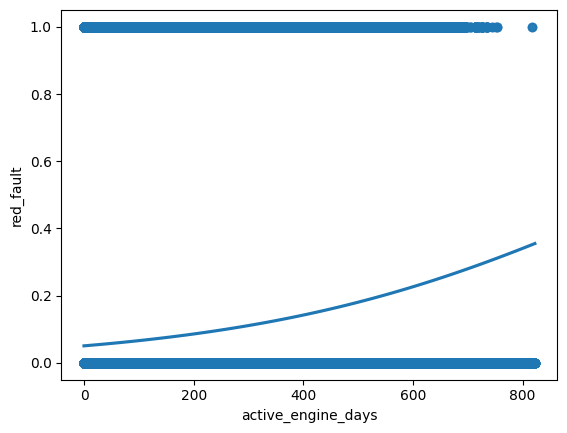

In [31]:
x = faults["active_engine_days"]
y = faults["red_fault"]
import seaborn as sns
sns.regplot(x=x, y=y, data=faults, logistic=True, ci=None)